 - In EWMA we only have one smoothing parameter i.e (alpha)
 - But in **Holt - Winter** we have 3 smoothing parameters
  - **level, trend and seasonality** respectively **alpha, beta and gamma**
  
 - we have two models differ with **seasonal** component
  - **additive** : when seasoanl component is constant
  - **multiplicative** : when seasonal component varies

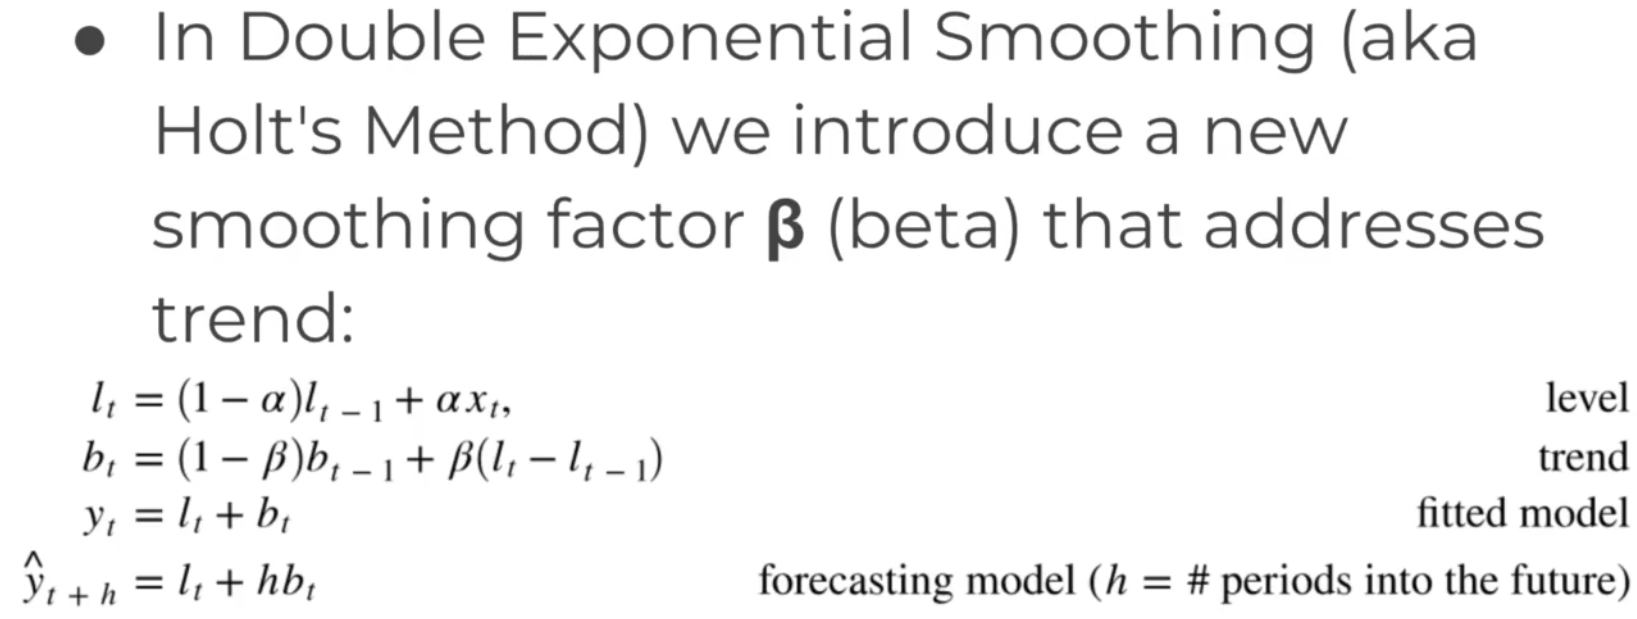

In [2]:
from PIL import Image
image = Image.open("holtwinter.png")
image

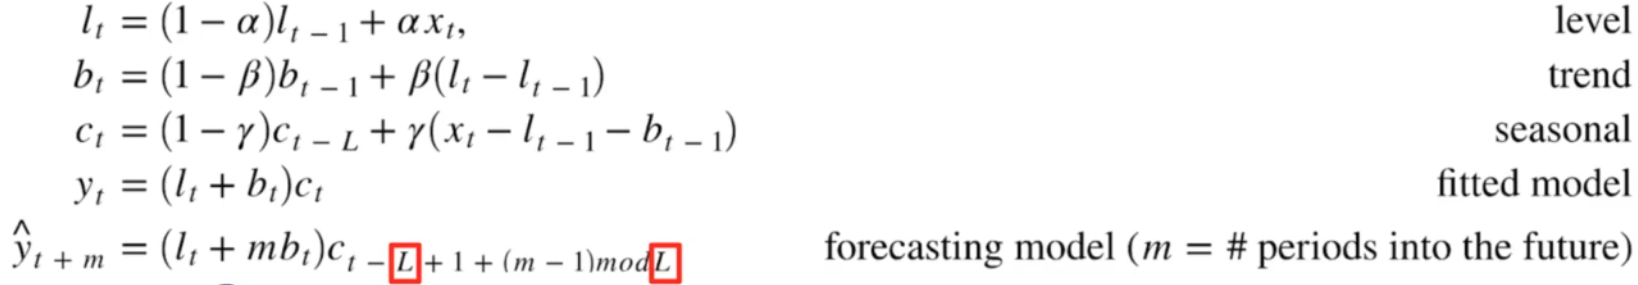

In [5]:
# with triple exponential smoothing "gamma"
# L = divisions per cycle
image = Image.open("holtwinter1.png")
image

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [3]:
airline = pd.read_csv('data/airline_passengers.csv', index_col= 'Month', parse_dates= True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [5]:
# generally for statmodels it will read pandas dataframe freq. so here pandas dataframe didn't mention the freq 
# so we have to fix a value
airline.index.freq = 'MS' # starting month

In [6]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [9]:
span = 12
alpha = 2 / (span +1)

In [10]:
airline['12-month-EWMA'] = airline['Thousands of Passengers'].ewm(alpha = alpha, adjust = False).mean()

In [11]:
airline.head()

,Thousands of Passengers,12-month-EWMA
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [12]:
model = SimpleExpSmoothing(airline['Thousands of Passengers'])
fitted_model = model.fit(smoothing_level = alpha, optimized = False)

In [13]:
fitted_model

In [14]:
fitted_model.fittedvalues[:6]

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
1949-06-01    118.359861
Freq: MS, dtype: float64

In [15]:
# we have to shift the values -1 so that it will match with EWMA
fitted_model.fittedvalues.shift(-1)[:6]

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
1949-06-01    120.919883
Freq: MS, dtype: float64

In [16]:
airline['holt-winters-simpleexpo'] = fitted_model.fittedvalues.shift(-1)

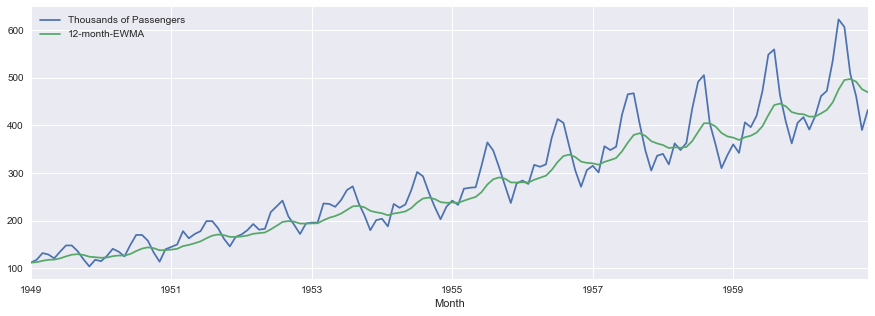

In [17]:
airline[['Thousands of Passengers', '12-month-EWMA']].plot(figsize = (15,5))
plt.show()

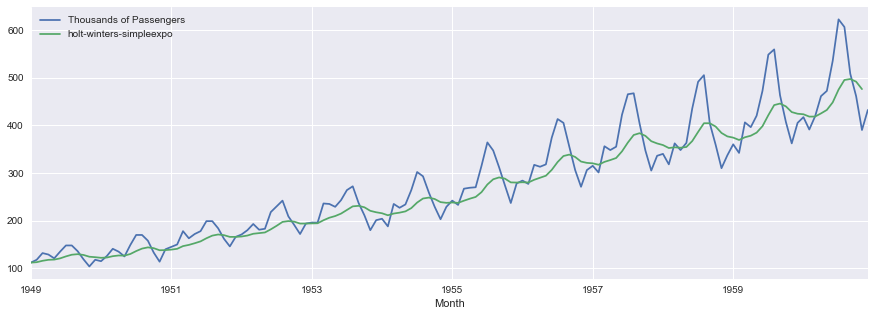

In [18]:
airline[['Thousands of Passengers', 'holt-winters-simpleexpo']].plot(figsize = (15,5))
plt.show()

### Double exponential smoothing

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [21]:
# if we see the above graph its pretty linear in fashion so we have to use "trend = additive" but if we see exponetial trend then 
# we use "trend = multiplicative"
model_exps = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'add')
fitted = model_exps.fit()

In [22]:
airline['holt-winters-doubleexps'] = fitted.fittedvalues.shift(-1)

In [23]:
airline.head()

,Thousands of Passengers,12-month-EWMA,holt-winters-simpleexpo,holt-winters-doubleexps
Month,,,,
1949-01-01,112,112.000000,112.000000,114.237772
1949-02-01,118,112.923077,112.923077,120.237772
1949-03-01,132,115.857988,115.857988,134.237772
1949-04-01,129,117.879836,117.879836,131.237772
1949-05-01,121,118.359861,118.359861,123.237772


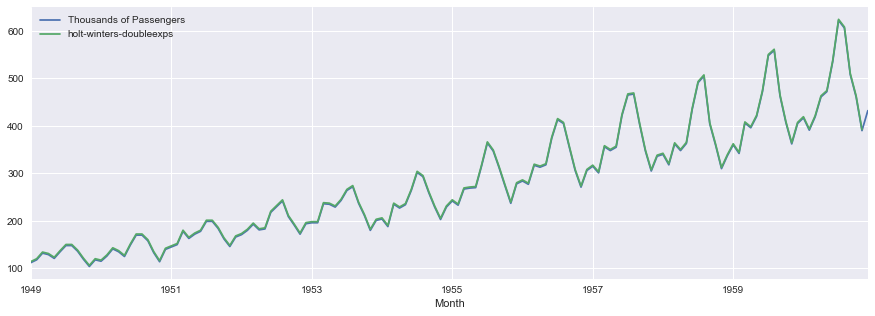

In [24]:
airline[['Thousands of Passengers', 'holt-winters-doubleexps']].plot(figsize = (15,5))
plt.show()

 - **Note** : if you see above plot due to **double exponenetial** smoothing the curve fits with original data

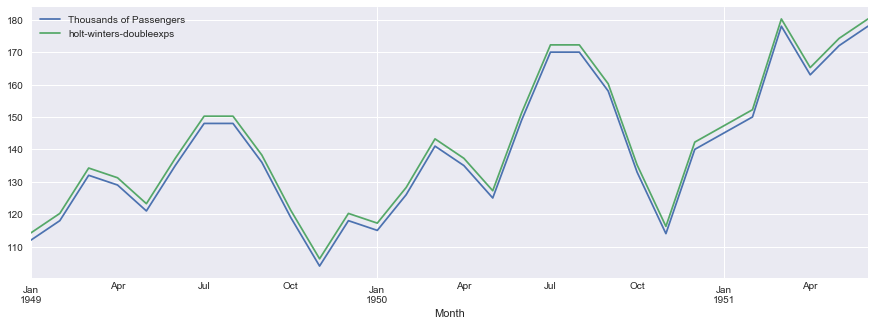

In [25]:
# lets see first 30 records and check how close the model is
airline[['Thousands of Passengers', 'holt-winters-doubleexps']].iloc[:30].plot(figsize = (15,5))
plt.show()

### Triple exponential smoothing

In [27]:
# this time we use trend = 'multiplicative'
model_exps = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'mul', seasonal= 'mul', seasonal_periods= 12)
fitted = model_exps.fit()

In [28]:
airline['holt-winters-tripleexps'] = fitted.fittedvalues # no need to do shifts because statmodels take care of them

In [29]:
airline.head()

,Thousands of Passengers,12-month-EWMA,holt-winters-simpleexpo,holt-winters-doubleexps,holt-winters-tripleexps
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.237772,111.608110
1949-02-01,118,112.923077,112.923077,120.237772,118.853687
1949-03-01,132,115.857988,115.857988,134.237772,133.343675
1949-04-01,129,117.879836,117.879836,131.237772,127.912641
1949-05-01,121,118.359861,118.359861,123.237772,120.991626


In [30]:
airline.columns

Index(['Thousands of Passengers', '12-month-EWMA', 'holt-winters-simpleexpo',
       'holt-winters-doubleexps', 'holt-winters-tripleexps'],
      dtype='object')

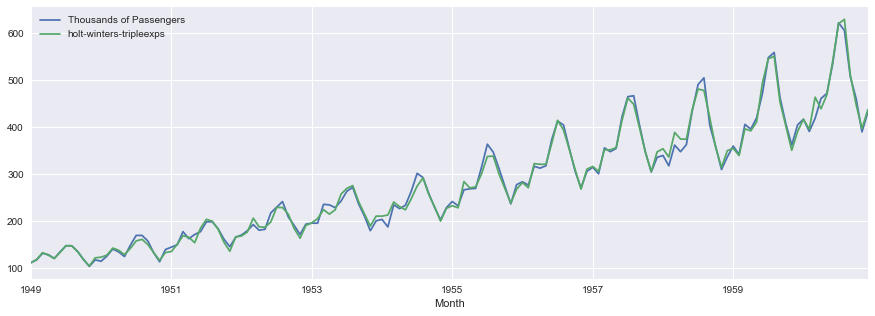

In [31]:
cols = ['Thousands of Passengers','holt-winters-tripleexps']
airline[cols].plot(figsize = (15,5))
plt.show()